In [6]:
%matplotlib inline
import numpy as np
from scipy.misc import factorial2
from scipy.special import factorial
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct

In [2]:
# In this notebook, I am attempting to solve the Classical Moment Problem starting from a Gaussian
# with moments s_n = (n-1)!! for n even

In [3]:
factorial(np.arange(20))

array([  1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
         6.00000000e+00,   2.40000000e+01,   1.20000000e+02,
         7.20000000e+02,   5.04000000e+03,   4.03200000e+04,
         3.62880000e+05,   3.62880000e+06,   3.99168000e+07,
         4.79001600e+08,   6.22702080e+09,   8.71782912e+10,
         1.30767437e+12,   2.09227899e+13,   3.55687428e+14,
         6.40237371e+15,   1.21645100e+17])

In [65]:
# here we define two functions. c(k,N) is the characteristic function for FCS
# we also define g(k) which is the characteristic function for a Gaussian for testing that everything works
n_max=80
n = np.arange(1,n_max+1)
factors = (1j)**n/factorial(n)/np.sqrt(n)
print(n)
print(factors)

def c(k,N):
    km = np.tile(k,(n_max,1))
    tosum = factors*np.power(km.T,n)
    return 1+np.sqrt(np.pi/2)*N*np.sum(tosum,axis=1)

gn = n - 1
gfactors = (-1)**(gn)/factorial(gn)
print(gfactors)
def g(k):
    km = np.tile(k,(n_max,1))
    tosum = gfactors*np.power(km.T,2*gn)
    return np.sum(tosum,axis=1)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80]
[  0.00000000e+000 +1.00000000e+000j  -3.53553391e-001 +0.00000000e+000j
  -0.00000000e+000 -9.62250449e-002j   2.08333333e-002 +0.00000000e+000j
   0.00000000e+000 +3.72677996e-003j  -5.67011515e-004 +0.00000000e+000j
  -0.00000000e+000 -7.49929510e-005j   8.76868528e-006 +0.00000000e+000j
   0.00000000e+000 +9.18577307e-007j  -8.71438950e-008 +0.00000000e+000j
  -0.00000000e+000 -7.55349488e-009j   6.02660063e-010 +0.00000000e+000j
   0.00000000e+000 +4.45397738e-011j  -3.06568571e-012 +0.00000000e+000j
  -0.00000000e+000 -1.97448919e-013j   1.19486933e-014 +0.00000000e+000j
   0.00000000e+000 +6.81878542e-016j  -3.68148239e-017 +0.00000000e+000j
  -0.00000000e+000 -1.88594307e-018j   9.19094961e-020 +0.00000000e+000j
   0.00000000e+000 +4.271

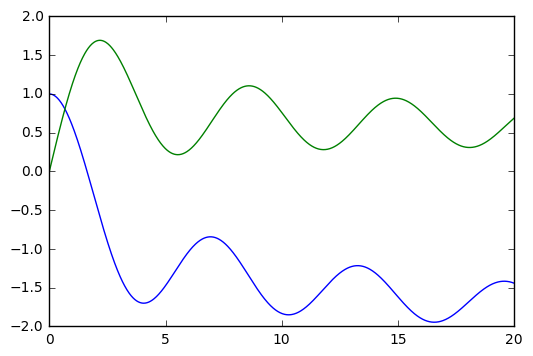

In [68]:
# create orthogonal polynominals
k = np.linspace(0,20,1025)
cf = c(k,1)
plt.plot(k,np.real(cf))
plt.plot(k,np.imag(cf))

2048


(0, 50)

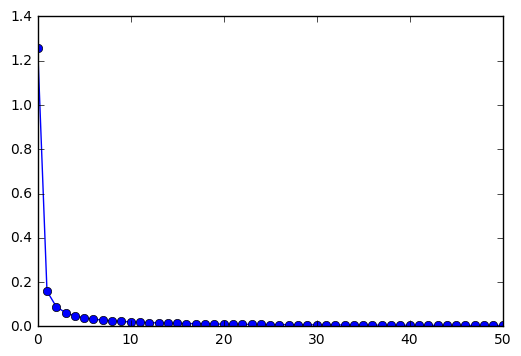

In [70]:
# need to find the proper way of doing an fft
cf_fft = np.fft.irfft(cf)
print(cf_fft.size)
plt.plot(abs(cf_fft),"o-")
plt.xlim((0,50))
#plt.ylim((-.2,.2))

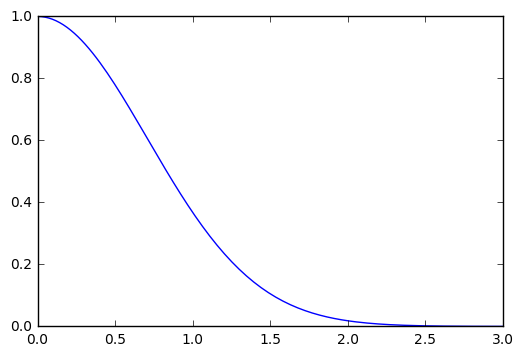

In [72]:
gk = np.linspace(0,3,128)
gauss = g(gk)
plt.plot(gk,gauss)

254


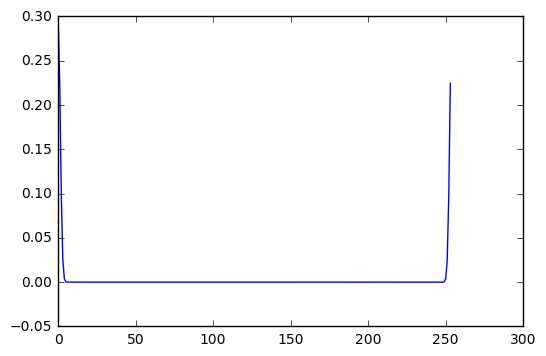

In [81]:
gauss_fft = np.fft.irfft(gauss)
print(gauss_fft.size)
plt.plot(np.real(gauss_fft))